<a href="https://colab.research.google.com/github/BrendaChepkoech/AUSTRALIAN-ROAD-FATALITIES-ANALYSIS/blob/main/AUSTRALIAN_ROAD_FATALITIES_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the question

### a) Specifying the Data Analytic Question

To carry out exploratory data analysis to identify the trends and causes of fatalities in Australian roads. 

### b) Defining the Metric for Success

To be able to carry out the analysis and identify trends in the road fatalities

### c) Understanding the context 

According to research, there have been more than 189,000 deaths on Australia’s roads. Approximately four people die and 90 people are seriously injured each day. The cost of road trauma to the Australian community is tragic and widespread.
Our project focuses on analyzing crash fatalities data in Australia according to several factors, including gender, age, state,  age group, type of road users, day of the week, and time of the week.


### d) Recording the Experimental Design

1. Loading the dataset to the environment
2. Previewing the data
3. Performing data cleaning
4. Exploratory data analysis
5. Hypothesis testing

### e) Data Relevance

The data is relevant because it has up to date information on road accidents in Australia. This will allow us to analyze the data effectively.

## 2. Reading the data

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the data
df = pd.read_csv('Crash_Data.csv')

## 3. Checking the Data

In [3]:
# Previewing the data
df.head()

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20212133,Vic,9,2021,Sunday,0:30,Single,NaN,NaN,NaN,NaN,Motorcycle rider,Male,38,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Weekend,Night
1,20214022,SA,9,2021,Saturday,23:31,Multiple,No,No,No,110,Pedestrian,Female,28,Major Cities of Australia,Adelaide - North,Playford (C),NaN,No,No,26_to_39,Weekend,Night
2,20212096,Vic,9,2021,Saturday,23:00,Single,NaN,NaN,NaN,NaN,Passenger,Male,19,Inner Regional Australia,Hume,Wangaratta (RC),Access road,No,No,17_to_25,Weekend,Night
3,20212145,Vic,9,2021,Saturday,22:25,Single,NaN,NaN,NaN,NaN,Driver,Male,23,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Weekend,Night
4,20212075,Vic,9,2021,Saturday,5:15,Single,NaN,NaN,NaN,NaN,Motorcycle rider,Male,46,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Weekend,Night


In [4]:
# Checking the tail
df.tail()

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
6236,20163125,Qld,5,2016,Sunday,22:00,Single,No,No,No,40,Driver,Male,34,NaN,NaN,NaN,NaN,No,No,26_to_39,Weekend,Night
6237,20161319,NSW,5,2016,Saturday,19:56,Multiple,No,No,No,80,Driver,Female,89,Major Cities of Australia,Hunter Valley exc Newcastle,Port Stephens,National or State Highway,No,No,75_or_older,Weekend,Night
6238,20161224,NSW,5,2016,Sunday,5:50,Single,No,No,No,80,Driver,Female,33,Inner Regional Australia,Mid North Coast,Kempsey,National or State Highway,No,No,26_to_39,Weekend,Night
6239,20167019,NT,5,2016,Friday,18:20,Multiple,No,No,No,60,Driver,Male,34,Remote Australia,Northern Territory - Outback,Alice Springs (T),National or State Highway,No,No,26_to_39,Weekend,Night
6240,20167019,NT,5,2016,Friday,18:20,Multiple,No,No,No,60,Passenger,Female,34,Remote Australia,Northern Ter,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Determining the no. of records in our dataset
df.shape

(6241, 23)

In [6]:
#Checking for unique values
df.nunique()

Crash ID                         5767
State                               8
Month                              12
Year                                6
Dayweek                             7
Time                             1019
Crash Type                          2
Bus Involvement                     2
Heavy Rigid Truck Involvement       2
Articulated Truck Involvement       2
Speed Limit                        17
Road User                           7
Gender                              3
Age                               102
National Remoteness Areas           5
SA4 Name 2016                      89
National LGA Name 2017            481
National Road Type                 12
Christmas Period                    2
Easter Period                       2
Age Group                           6
Day of week                         2
Time of day                         2
dtype: int64

In [7]:
# Checking whether each column has an appropriate datatype
df.dtypes

Crash ID                          int64
State                            object
Month                             int64
Year                              int64
Dayweek                          object
Time                             object
Crash Type                       object
Bus Involvement                  object
Heavy Rigid Truck Involvement    object
Articulated Truck Involvement    object
Speed Limit                      object
Road User                        object
Gender                           object
Age                               int64
National Remoteness Areas        object
SA4 Name 2016                    object
National LGA Name 2017           object
National Road Type               object
Christmas Period                 object
Easter Period                    object
Age Group                        object
Day of week                      object
Time of day                      object
dtype: object

In [8]:
# Identifying the Missing Data
df.isnull().sum()

Crash ID                           0
State                              0
Month                              0
Year                               0
Dayweek                            0
Time                               0
Crash Type                         0
Bus Involvement                   22
Heavy Rigid Truck Involvement     22
Articulated Truck Involvement     22
Speed Limit                       76
Road User                          0
Gender                             6
Age                                0
National Remoteness Areas        903
SA4 Name 2016                    891
National LGA Name 2017           898
National Road Type               907
Christmas Period                   1
Easter Period                      1
Age Group                         11
Day of week                        1
Time of day                        1
dtype: int64

## 4. External Data Source Validation

It is from the Australian government. From their database of Australian Road Deaths Database (ARDD). It was conducted by the Bureau of Infrastructure and Transport Research Economics. It was then uploaded to Kaggle, by "Deep Contractor". The link to the original dataset is [here](https://data.gov.au/dataset/ds-dga-5b530fb8-526e-4fbf-b0f6-aa24e84e4277/details?q=ardd) 

## 5. Cleaning

In [9]:
# 1. Dropping the columns with null values
# Drop National Remoteness Areas, SA4 Name 2016, National LGA Name 2017, National Road Type
# Due to missing values 
df = df.drop(["National Remoteness Areas", "SA4 Name 2016", "National LGA Name 2017", "National Road Type", "Heavy Rigid Truck Involvement"], axis = 1)

In [10]:
# 2. Dropping null values
df = df.dropna(axis = 0)

In [11]:
#  Confirming that there are no null values
df.isnull().sum()

Crash ID                         0
State                            0
Month                            0
Year                             0
Dayweek                          0
Time                             0
Crash Type                       0
Bus Involvement                  0
Articulated Truck Involvement    0
Speed Limit                      0
Road User                        0
Gender                           0
Age                              0
Christmas Period                 0
Easter Period                    0
Age Group                        0
Day of week                      0
Time of day                      0
dtype: int64

In [12]:
# 3. Conversion time column to datetime data type
df["Time"] = pd.to_datetime(df["Time"])

In [13]:
#checking the data types
df.dtypes

Crash ID                                  int64
State                                    object
Month                                     int64
Year                                      int64
Dayweek                                  object
Time                             datetime64[ns]
Crash Type                               object
Bus Involvement                          object
Articulated Truck Involvement            object
Speed Limit                              object
Road User                                object
Gender                                   object
Age                                       int64
Christmas Period                         object
Easter Period                            object
Age Group                                object
Day of week                              object
Time of day                              object
dtype: object

In [14]:
# 4. Checking for outliers
df.describe()

,Crash ID,Month,Year,Age
count,6.149000e+03,6149.000000,6149.000000,6149.000000
mean,2.018782e+07,6.641730,2018.489348,44.691495
std,1.599923e+04,3.394706,1.586302,21.954505
min,2.016100e+07,1.000000,2016.000000,0.000000
25%,2.017313e+07,4.000000,2017.000000,26.000000
50%,2.018703e+07,7.000000,2018.000000,42.000000
75%,2.020206e+07,9.000000,2020.000000,62.000000
max,2.021801e+07,12.000000,2021.000000,101.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


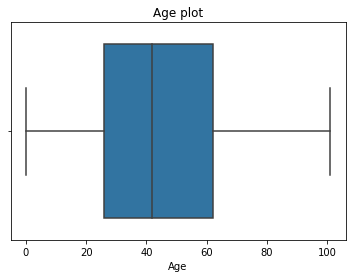

In [15]:
#plot a box plot to check for outliers
plt.title("Age plot")
sns.boxplot(df['Age'])
plt.show()

# we noticed that there no outliers

In [16]:
# 5. Check for duplicates
df.duplicated().sum()

6

In [17]:
#Droping duplicates
df = df.drop_duplicates()

In [18]:
df.duplicated().sum()

0

## 6. Exploratory Analysis

#### Univariate

In [19]:
df["State"].value_counts()

NSW    1795
Qld    1341
Vic    1237
WA      846
SA      509
NT      202
Tas     173
ACT      40
Name: State, dtype: int64

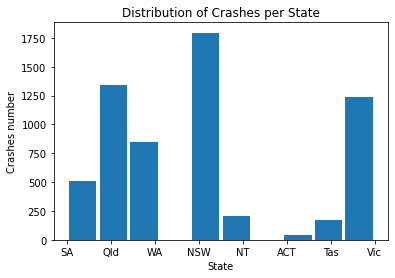

<Figure size 288x216 with 0 Axes>

In [20]:
#creating a histogram for number of crashes in different states
plt.hist(df["State"], bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('State')
plt.ylabel('Crashes number')
plt.title('Distribution of Crashes per State') 
plt.figure(figsize=(4, 3))
plt.show()

In [21]:
df["Crash Type"].value_counts()

Single      3467
Multiple    2676
Name: Crash Type, dtype: int64

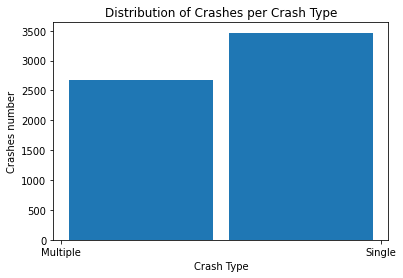

<Figure size 288x216 with 0 Axes>

In [22]:
#creating a histogram for types of crashes
plt.hist(df["Crash Type"], bins=2, histtype='bar', rwidth=0.9)
plt.xlabel('Crash Type')
plt.ylabel('Crashes number')
plt.title('Distribution of Crashes per Crash Type') 
plt.figure(figsize=(4, 3))
plt.show()

In [23]:
df["Road User"].value_counts()

Driver                          2932
Motorcycle rider                1081
Passenger                       1056
Pedestrian                       832
Pedal cyclist                    190
Other/-9                          26
Motorcycle pillion passenger      26
Name: Road User, dtype: int64

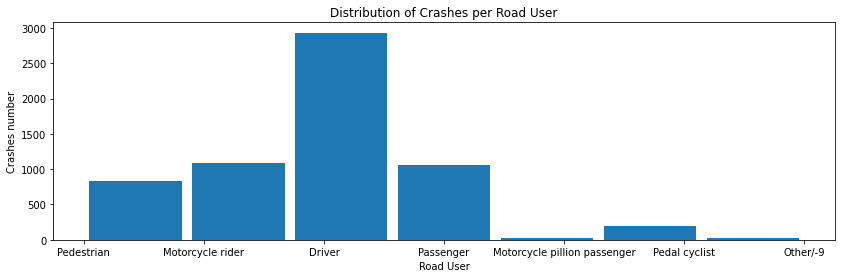

In [24]:

#creating a histogram for number of crashes for different road users
plt.figure(figsize=(14, 4))
plt.hist(df["Road User"], bins=7, histtype='bar', rwidth=0.9)
plt.xlabel('Road User')
plt.ylabel('Crashes number')
plt.title('Distribution of Crashes per Road User') 
plt.show()

Specific objective: To determine the number of road fatalities experienced  by different age groups

In [25]:
df["Age"].value_counts(bins = 10, sort = False)

(-0.10200000000000001, 10.1]     138
(10.1, 20.2]                     685
(20.2, 30.3]                    1240
(30.3, 40.4]                     904
(40.4, 50.5]                     836
(50.5, 60.6]                     726
(60.6, 70.7]                     628
(70.7, 80.8]                     534
(80.8, 90.9]                     372
(90.9, 101.0]                     80
Name: Age, dtype: int64

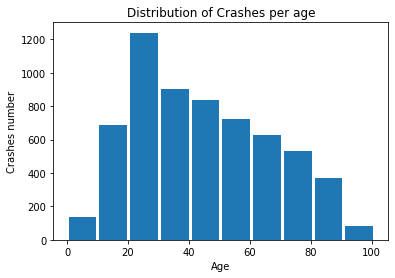

<Figure size 288x216 with 0 Axes>

In [26]:
#creating a histogram for number of crashes for different ages
plt.hist(df["Age"], bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('Age')
plt.ylabel('Crashes number')
plt.title('Distribution of Crashes per age') 
plt.figure(figsize=(4, 3))
plt.show()

Specific objective: To determine the number of road fatalities experienced  by gender

In [27]:
df["Gender"].value_counts()

Male           4563
Female         1579
Unspecified       1
Name: Gender, dtype: int64

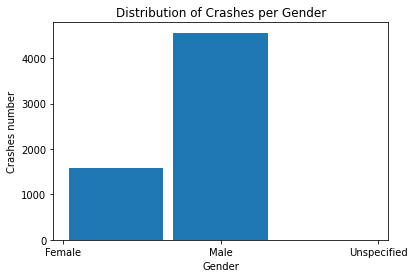

<Figure size 288x216 with 0 Axes>

In [28]:
#creating a histogram for number of crashes per gender
plt.hist(df["Gender"], histtype='bar', rwidth=0.9, bins = 3)
plt.xlabel('Gender')
plt.ylabel('Crashes number')
plt.title('Distribution of Crashes per Gender') 
plt.figure(figsize=(4, 3))
plt.show()

Specific objective: To determine the number of road fatalities occurring on different days of the week

In [29]:
df["Dayweek"].value_counts()

Saturday     1083
Sunday        983
Friday        970
Thursday      806
Wednesday     795
Monday        755
Tuesday       751
Name: Dayweek, dtype: int64

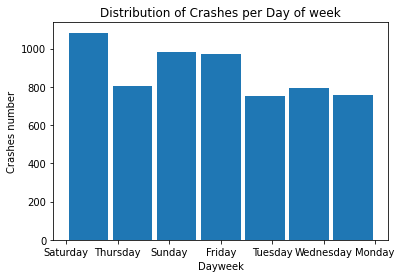

<Figure size 288x216 with 0 Axes>

In [30]:
plt.hist(df["Dayweek"], histtype='bar', rwidth=0.9, bins = 7)
plt.xlabel('Dayweek')
plt.ylabel('Crashes number')
plt.title('Distribution of Crashes per Day of week') 
plt.figure(figsize=(4, 3))
plt.show()

In [31]:
df['Age Group'].value_counts()

40_to_64       1928
26_to_39       1391
17_to_25       1210
75_or_older     777
65_to_74        556
0_to_16         281
Name: Age Group, dtype: int64

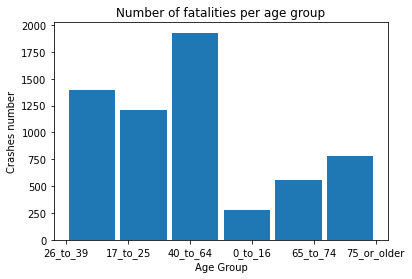

<Figure size 288x216 with 0 Axes>

In [32]:
#creating a histogram for no.crashes for differenyt age groups
plt.hist(df["Age Group"], histtype='bar', rwidth=0.9, bins = 6)
plt.xlabel('Age Group')
plt.ylabel('Crashes number')
plt.title('Number of fatalities per age group') 
plt.figure(figsize=(4, 3))
plt.show()

In [33]:
#summary for the age column 
df['Age'].describe()

count    6143.000000
mean       44.718379
std        21.948227
min         0.000000
25%        26.000000
50%        42.000000
75%        62.000000
max       101.000000
Name: Age, dtype: float64

#### Bivariate

Specific objective: To determine the number of road fatalities occurring at different times of the day.

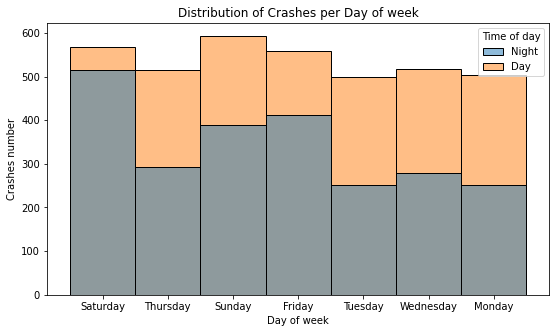

In [34]:
#Stacked column chart for days of week vs time of the day
plt.figure(figsize=(9, 5))
sns.histplot(x = df["Dayweek"], hue = df["Time of day"])
plt.xlabel('Day of week')
plt.ylabel('Crashes number')
plt.title('Distribution of Crashes per Day of week') 
plt.show()

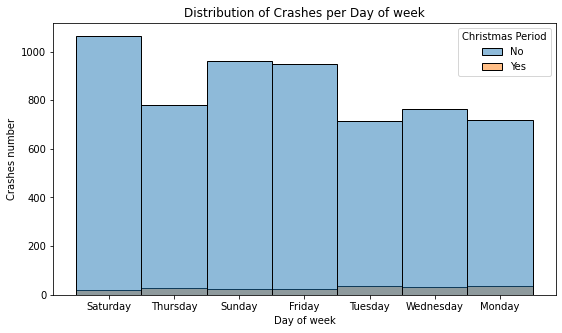

In [35]:
#Stacked column chart of day of week vs christmass period
plt.figure(figsize=(9, 5))
sns.histplot(x = df["Dayweek"], hue = df["Christmas Period"])
plt.xlabel('Day of week')
plt.ylabel('Crashes number')
plt.title('Distribution of Crashes per Day of week') 
plt.show()

In [36]:
df[["Dayweek", "Christmas Period"]].value_counts(sort = False)

Dayweek    Christmas Period
Friday     No                   947
           Yes                   23
Monday     No                   720
           Yes                   35
Saturday   No                  1064
           Yes                   19
Sunday     No                   961
           Yes                   22
Thursday   No                   779
           Yes                   27
Tuesday    No                   715
           Yes                   36
Wednesday  No                   764
           Yes                   31
dtype: int64

Because it is one day, few people travel. In that year.

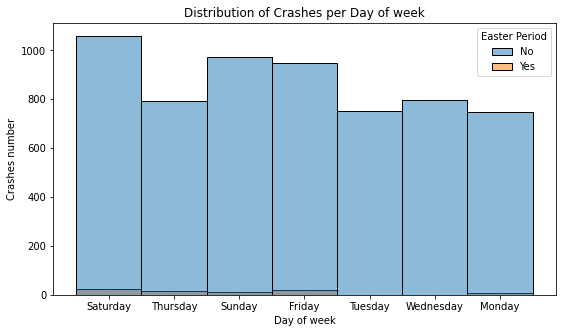

In [37]:
#Stacked column chart of day of week vs easter period
plt.figure(figsize=(9, 5))
sns.histplot(x = df["Dayweek"], hue = df["Easter Period"])
plt.xlabel('Day of week')
plt.ylabel('Crashes number')
plt.title('Distribution of Crashes per Day of week') 
plt.show()

In [38]:
df[["Dayweek", "Easter Period"]].value_counts(sort = False)

Dayweek    Easter Period
Friday     No                949
           Yes                21
Monday     No                747
           Yes                 8
Saturday   No               1059
           Yes                24
Sunday     No                973
           Yes                10
Thursday   No                791
           Yes                15
Tuesday    No                751
Wednesday  No                795
dtype: int64

They celebrate easter more than christmas. So they travel less. So there are fewer accidents

Specific objective: To determine the number of road fatalities over the period of 1989 to 2021

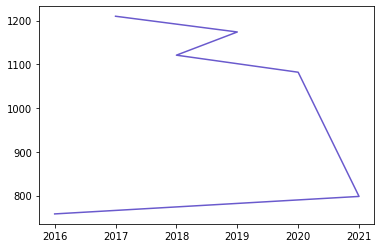

In [39]:
# Line graph for different years
df['Year'].value_counts().plot.line(color = 'slateblue')

During the 1990's, there was bad road networks. There was bad training. Technology has improved that has improved safety.

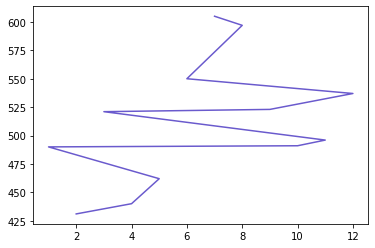

In [40]:
# Line graph for monthly data points
df['Month'].value_counts().plot.line(color = 'slateblue')

There is not specific month where there is a more fatalities than the other

Specific objective: To determine the number of road fatalities is more on weekends than weekdays.

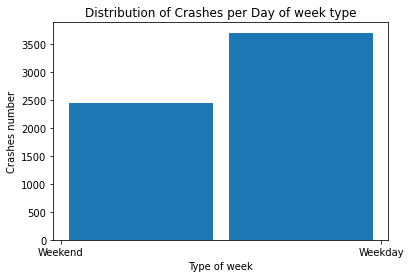

<Figure size 288x216 with 0 Axes>

In [41]:
#creating a histogram for Crashes per Day of week type
plt.hist(df["Day of week"], histtype='bar', rwidth=0.9, bins = 2)
plt.xlabel('Type of week')
plt.ylabel('Crashes number')
plt.title('Distribution of Crashes per Day of week type') 
plt.figure(figsize=(4, 3))
plt.show()

In [42]:
#Encoding the data
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
df['Day of week'] = en.fit_transform(df['Day of week'])
df['State']= en.fit_transform(df['State'])
df['Dayweek']=en.fit_transform(df['Dayweek'])
df['Crash Type']=en.fit_transform(df['Crash Type'])
df['Bus Involvement']=en.fit_transform(df['Bus Involvement'])
df['Articulated Truck Involvement']=en.fit_transform(df['Articulated Truck Involvement'])
df['Road User']=en.fit_transform(df['Road User'])
df['Gender']=en.fit_transform(df['Gender'])
df['Christmas Period']=en.fit_transform(df['Christmas Period'])
df['Easter Period']=en.fit_transform(df['Easter Period'])
df['Time of day']=en.fit_transform(df['Time of day'])
df['Age Group']=en.fit_transform(df['Age Group'])
df['Speed Limit'].replace({'<40':'40','Unspecified':'40'},inplace = True)
df['Speed Limit'] = df['Speed Limit'].astype(int)

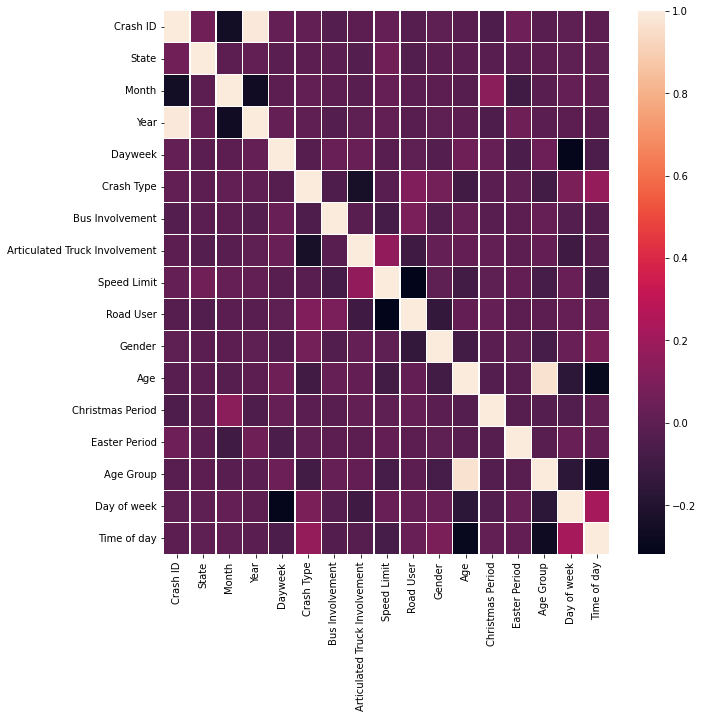

In [43]:
#df.info()
corr_matrix = df.corr()
corr_matrix
#visualising the corrmatrix
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr_matrix, annot=False,  linewidths=.5, ax=ax)

In [44]:
df.head(1)

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,Age,Christmas Period,Easter Period,Age Group,Day of week,Time of day
1,20214022,4,9,2021,2,2021-11-22 23:31:00,0,0,0,110,6,0,28,0,0,2,1,1


## Multivariate analysis

####Principal Component Analysis

In [45]:

#Splitting the dataset into the Training set and Test set
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X=df[['Crash Type','Christmas Period', 'Easter Period' ]]
sc = StandardScaler()
X = sc.fit_transform(X)

pca = PCA()
X = pca.fit_transform(X)

In [46]:
#getting the variance ration
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.34166424, 0.33192208, 0.32641368])

###Factor Analyzer


In [47]:
!pip install factor_analyzer==0.2.3

In [48]:
from factor_analyzer.factor_analyzer import FactorAnalyzer

# Creating factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(df[['Crash Type','Christmas Period', 'Easter Period' ]], 3, rotation=None)

# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev


,Original_Eigenvalues
0,1.024993
1,0.995766
2,0.979241


In [49]:
fa.analyze(df[['Crash Type','Christmas Period', 'Easter Period' ]], 1, rotation="varimax")
fa.loadings

/usr/local/lib/python3.7/dist-packages/factor_analyzer/factor_analyzer.py:770: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn('No rotation will be performed when '


,Factor1
Crash Type,0.051312
Christmas Period,-0.180668
Easter Period,0.113034


In [50]:
#getting the vaiance 
fa.get_factor_variance()

,Factor1
SS Loadings,0.048051
Proportion Var,0.016017
Cumulative Var,0.016017


From the observations I would recommend that the government should allocate more resources to NSW state for improvements of road networks such as raising modern traffic signs such as speed limit signs, tarmacking and deploying more traffic officers in the roads.

Secondly,the government should enhance strict punitive measures for anyone who overspeeds in NSW roads as it has been accounted for as the major cause of fatalities. NSW drivers should benchmark the drivers in ACT to see what they are doing differently.

All cars should be fitted with airbags for emergency safety to safe drivers in case of car crash.
The young people aged 17 -25 should be educated on the importance of road safety as they are the ones prone to the fatalities.


### Hypothesis Testing

Null: The average age of crash fatalities on the weekday is equal to the average age of crash fatalities on the weekend i.e U1 = U2.

Alternative: The average age of crash fatalities on the weekday is not equal to the average age of crash fatalities on the weekend i.e U1 != U2.

where U1 = average age of crash fatalities during the weekend 

U2 is the average age of crush fatalities during the weekday.

In [51]:
# Converting the encoded data to labels

df['Day of week'] = df['Day of week'].replace({0:'Weekday',1:'Weekend',})

df['Day of week'].unique()


array(['Weekend', 'Weekday'], dtype=object)

In [52]:
# Creating a weekend and weekday data frame

df1 = df[df['Day of week']== 'Weekday']

df2 = df[df['Day of week']== 'Weekend']


In [53]:
# Sampling data Randomly
import random
sample_weekday = df1['Age'].sample(n = 1500,random_state=1)

sample_weekend = df2['Age'].sample(n = 1500,random_state=1)


In [54]:
#checking for normality using shapiro test 
#using the level of signifance 0.05

from scipy.stats import shapiro 
stat, p = shapiro(sample_weekday)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

# p_value,1.00 > 0.05 hence failing to reject null hypothesis thus population is from a normal distribution

Statistics=0.962, p=0.000
Sample does not look Gaussian


In [55]:
#checking normality for the weekend population using shapiro

stat, p = shapiro(sample_weekend)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')
 #p_value,1 > 0.05 hence fail to reject the null hypothesis

Statistics=0.957, p=0.000
Sample does not look Gaussian


In [56]:
#Calculating the p-value, t-test 
from scipy.stats import ttest_ind
statistic, pvalue = ttest_ind(sample_weekday, sample_weekend, equal_var=False)
pvalue = 1 - pvalue

# Printing out the p-value and the statistic

print("p-value of the test = ",pvalue)
print("Statistic = ",statistic)
print("_" * 100)
if pvalue < 0.05:
  print("The average age of crash fatalities on the weekday is equal to the average age of crash fatalaties on the weekend.")
  print("_" * 100) 
else:
  print("The average age of crash fatalities on the weekday is not equal to the average age of crash fatalaties on the weekend.")
 

# Means of the two samples
print(sample_weekday.mean())
print(sample_weekend.mean())

p-value of the test =  1.0
Statistic =  9.8177635269062
____________________________________________________________________________________________________
The average age of crash fatalities on the weekday is not equal to the average age of crash fatalaties on the weekend.
48.02066666666666
40.29666666666667


The results were: p-value = 0.99999 and statistic = 8.29
Since the p-value, 0.99>0.05 we fail to reject our null hypothesis and conclude that there is no age difference between the victims of crash over the weekend and weekday this means the road user over the week seems to be coming from the same age group
